In [35]:
# -----------------------------------------------------------------------------
# Gated working memory with an echo state network
# Copyright (c) 2018 Nicolas P. Rougier
#
# Distributed under the terms of the BSD License.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from data import generate_data, smoothen, str_to_bmp, convert_data 
from model_modified import generate_model, train_model, test_model
from identify_neurons import identify_neurons
from lesion import lesion
import sys
import os

if __name__ == '__main__':
    # Display
    fig = plt.figure(figsize=(10,8))
    fig.patch.set_alpha(0.0)
    n_subplots = 1

    # 1-3-3 scalar task
    # Random generator initialization
    task = "1-3-3-scalar"
    n_gate = 3
    print(task)

    np.random.seed(1)

    save_err = {}
    save_w_out = {}

    initial_model = generate_model(shape=(1+n_gate,1000,n_gate), sparsity=0.5,
                                radius=0.1, scaling=(1.0, 0.33), leak=1.0,
                                noise=(0.000, 0.0000, 0.000), seed = 1)

    # Build memory
    for i in range(100,1001,100 ):

        
        model = lesion(initial_model, np.arange(i))

        # Training data
        n = 25000
        values = np.random.uniform(-1, +1, n)
        ticks = np.random.uniform(0, 1, (n, n_gate)) < 0.01
        train_data = generate_data(values, ticks)

        # Testing data
        n = 2500
        values = smoothen(np.random.uniform(-1, +1, n))
        ticks = np.random.uniform(0, 1, (n, n_gate)) < 0.01
        test_data = generate_data(values, ticks, last = train_data["output"][-1])

        error = train_model(model, train_data, seed =1 )
        print("Training error : {0}".format(error))

        # # identify the neurons to be lesioned
        # num_lesion_neurons = 1
        # neurons_lesion_dict = identify_neurons(model['W_out'], num_lesion_neurons)   # a dictionary of lesioned neurons, choices made on output/method
        # neurons_lesion = neurons_lesion_dict['random, output 2']

        # lesion correspoing weights of selected neurons
        # lesioned_model = lesion(model, neurons_lesion)

        error_wo_lesion = test_model(model, test_data, 1)
        save_err[ f'{i} neurons'] = error_wo_lesion
        save_w_out[f'{i} neurons'] = model['W_out']





        #error_w_lesion = test_model(lesioned_model, test_data, 42)
        print("Testing error without lesion : {0}".format(error_wo_lesion))
        #print("Testing error with lesion : {0}".format(error_w_lesion))
        # np.save(files[0], test_data)
        # np.save(files[1], model["output"])
        # np.save(files[2], model["state"])

        # Display
        # colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
        # data = test_data

        # ax2 = plt.subplot(n_subplots, 1, 1)
        # ax2.tick_params(axis='both', which='major', labelsize=8)
        # ax2.plot(data["input"][:,0],  color='0.75', lw=1.0)

        # X, Y = np.arange(len(data)), np.ones(len(data))
        # for i in range(n_gate):
        #     C = np.zeros((len(data),4))
        #     r = eval("0x"+colors[i][1:3])
        #     g = eval("0x"+colors[i][3:5])
        #     b = eval("0x"+colors[i][5:7])
        #     C[:,0] = r/255
        #     C[:,1] = g/255
        #     C[:,2] = b/255
        #     C[:,3] = data["input"][:,1+i]
        #     ax2.scatter(X, -1.05*Y-0.04*i, s=1.5, facecolors=C, edgecolors=None)
        #     ax2.plot(data["output"][:,i],  color='0.75', lw=1.0)
        #     ax2.plot(model["output"][:,i], lw=1.5, zorder=10)
        #     #ax2.plot(lesioned_model["output"][:,i], lw=1.5, zorder=10)

        # ax2.text(-25, -1.05, "Ticks:",
        #         fontsize=8, transform=ax2.transData,
        #         horizontalalignment="right", verticalalignment="center")
        # ax2.set_ylim(-1.25,1.25)
        # ax2.yaxis.tick_right()
        # ax2.set_ylabel("Input & Output")
        # ax2.text(0.01, 0.9, "B",
        #         fontsize=16, fontweight="bold", transform=ax2.transAxes,
        #         horizontalalignment="left", verticalalignment="top")
        # plt.show()

1-3-3-scalar


100%|██████████| 24999/24999 [00:34<00:00, 733.72it/s] 


Training error : 0.001176054543675101


100%|██████████| 24999/24999 [00:33<00:00, 741.17it/s]


Training error : 0.005120902192175615


100%|██████████| 24999/24999 [00:37<00:00, 660.82it/s]


Training error : 0.0028912660220019315


100%|██████████| 24999/24999 [00:39<00:00, 633.03it/s]


Training error : 0.0036385821380534797


100%|██████████| 24999/24999 [00:39<00:00, 636.56it/s] 


Training error : 0.0027240491180454403


100%|██████████| 24999/24999 [00:38<00:00, 642.00it/s]


Training error : 0.0014410660077623198


100%|██████████| 24999/24999 [00:33<00:00, 754.73it/s] 


Training error : 0.003173672604764233


100%|██████████| 24999/24999 [00:33<00:00, 741.79it/s] 


Training error : 0.0047381683318744065


100%|██████████| 24999/24999 [00:32<00:00, 773.84it/s] 


Training error : 0.012018954778175116


100%|██████████| 24999/24999 [00:33<00:00, 746.83it/s]


Training error : 0.5775484482313701


100%|██████████| 2500/2500 [00:05<00:00, 450.52it/s]


<Figure size 720x576 with 0 Axes>

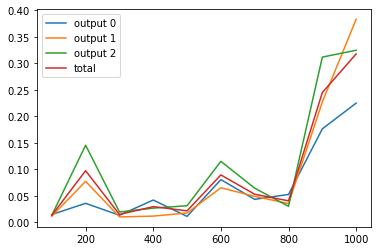

In [36]:
save_err

list(list(save_err.values())[0].values())

y = []

for i in range(10):
    y.append(list(list(save_err.values())[i].values()))

y
x=np.arange(100, 1001, 100)
# ax.plot([1, 2, 3], label=)
# ax.legend()
plt.plot(x,y, label=['output 0','output 1','output 2','total'])
plt.legend()
plt.show()


In [25]:
list(list(save_err.values())[7].values())

save_err["800 neurons"]


{'error0': 0.21515692407411496,
 'error1': 0.049173319971433725,
 'error2': 0.24974494761265692,
 'error_whole': 0.1924257919580916}

In [33]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])